In [3]:
%pylab inline
import pandas as pd
import datetime as dt
import requests
from scipy.integrate import odeint
from scipy.optimize import curve_fit

pd.plotting.register_matplotlib_converters()

matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['axes.grid'] = True

Populating the interactive namespace from numpy and matplotlib


In [12]:
data = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
US = data[(data["Country/Region"] == "US")]
US = pd.DataFrame({"confirmed" : US.iloc[:, 4:].sum(), "date" : pd.to_datetime(US.columns[4:], format="%m/%d/%y")})
data

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,110,110,120,170,174,237,273,281,299,349
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,186,197,212,223,243,259,277,304,333,361
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,409,454,511,584,716,847,986,1171,1251,1320
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,267,308,334,370,376,390,428,439,466,501
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,4,5,7,7,7,8,8,8,10,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,NaN,Malawi,-13.254308,34.301525,0,0,0,0,0,0,...,0,0,0,0,0,0,3,3,4,4
258,Falkland Islands (Islas Malvinas),United Kingdom,-51.796300,-59.523600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2
259,Saint Pierre and Miquelon,France,46.885200,-56.315900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
260,NaN,South Sudan,6.877000,31.307000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [13]:
data = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
US_deaths = data[(data["Country/Region"] == "US")]
US_deaths = pd.DataFrame({"deaths" : US_deaths.iloc[:, 4:].sum(), "date" : pd.to_datetime(US_deaths.columns[4:], format="%m/%d/%y")})
data

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,4,4,4,4,4,4,6,6,7,7
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,8,10,10,11,15,15,16,17,20,20
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,26,29,31,35,44,58,86,105,130,152
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,3,3,6,8,12,14,15,16,17,18
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,0,0,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,NaN,Malawi,-13.254308,34.301525,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
258,Falkland Islands (Islas Malvinas),United Kingdom,-51.796300,-59.523600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
259,Saint Pierre and Miquelon,France,46.885200,-56.315900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
260,NaN,South Sudan,6.877000,31.307000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# r = requests.get('https://covidtracking.com/api/us/daily')

# print(r.json())

tests2 = pd.read_csv("https://covidtracking.com/api/us/daily.csv")
tests2['date'] = pd.to_datetime(tests2['date'], format="%Y%m%d")
tests2.sort_values(by='date', inplace=True, ascending=True, ignore_index=True)

# Ref: https://www.cdc.gov/coronavirus/2019-ncov/cases-updates/testing-in-us.html
tests_total = [10,36,53,101,79,77,65,102,256,63,310,33,132,93,107,75,93,0,38,38,97,58,48,41,54,25,35,42,69,59,252,257,69,68,
               63,107,200,263,364,290,653,861,1231,1731,1911,1632,1661,3138,3385,4156,5917,6470,5737,5478,10118,10533,9782,9121,8569]
tests_phl = [0,0,0,0,0,0,0,0,0,0,0,0,1,0,3,1,0,0,2,1,2,2,1,5,3,1,28,10,6,4,3,3,2,18,13,27,138,177,284,259,559,788,1120,1645,
             1906,1453,1579,3102,3213,4013,5716,6441,5717,5477,10115,10518,9761,9106,8558]

dti = pd.date_range('2020-01-22', periods=len(tests_total), freq='D')

cumtests_total = np.cumsum(tests_total)
cumtests_phl = np.cumsum(tests_phl)

cumtests_tot_df = pd.DataFrame({"tests": cumtests_total, "dates":dti})
cumtests_phl_df = pd.DataFrame({"tests": cumtests_phl, "dates":dti})

tests2

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,death,hospitalized,total,totalTestResults,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
0,2020-03-04,14,118,748,103,NaN,NaN,NaN,NaN,NaN,...,10,NaN,969,866,866,NaN,NaN,NaN,NaN,NaN
1,2020-03-05,24,176,953,197,NaN,NaN,NaN,NaN,NaN,...,11,NaN,1326,1129,1129,1.0,0.0,205.0,58.0,263.0
2,2020-03-06,36,223,1571,458,NaN,NaN,NaN,NaN,NaN,...,14,NaN,2252,1794,1794,3.0,0.0,618.0,47.0,665.0
3,2020-03-07,51,341,1809,602,NaN,NaN,NaN,NaN,NaN,...,16,NaN,2752,2150,2150,2.0,0.0,238.0,118.0,356.0
4,2020-03-08,51,417,2335,347,NaN,NaN,NaN,NaN,NaN,...,18,NaN,3099,2752,2752,2.0,0.0,526.0,76.0,602.0
5,2020-03-09,51,584,3367,313,NaN,NaN,NaN,NaN,NaN,...,22,NaN,4264,3951,3951,4.0,0.0,1032.0,167.0,1199.0
6,2020-03-10,51,778,3807,469,NaN,NaN,NaN,NaN,NaN,...,24,NaN,5054,4585,4585,2.0,0.0,440.0,194.0,634.0
7,2020-03-11,51,1054,6070,563,NaN,NaN,NaN,NaN,NaN,...,27,NaN,7687,7124,7124,3.0,0.0,2263.0,276.0,2539.0
8,2020-03-12,51,1315,8041,673,NaN,NaN,NaN,NaN,NaN,...,36,NaN,10029,9356,9356,9.0,0.0,1971.0,261.0,2232.0
9,2020-03-13,51,1922,13613,1130,NaN,NaN,NaN,NaN,NaN,...,39,NaN,16665,15535,15535,3.0,0.0,5572.0,607.0,6179.0


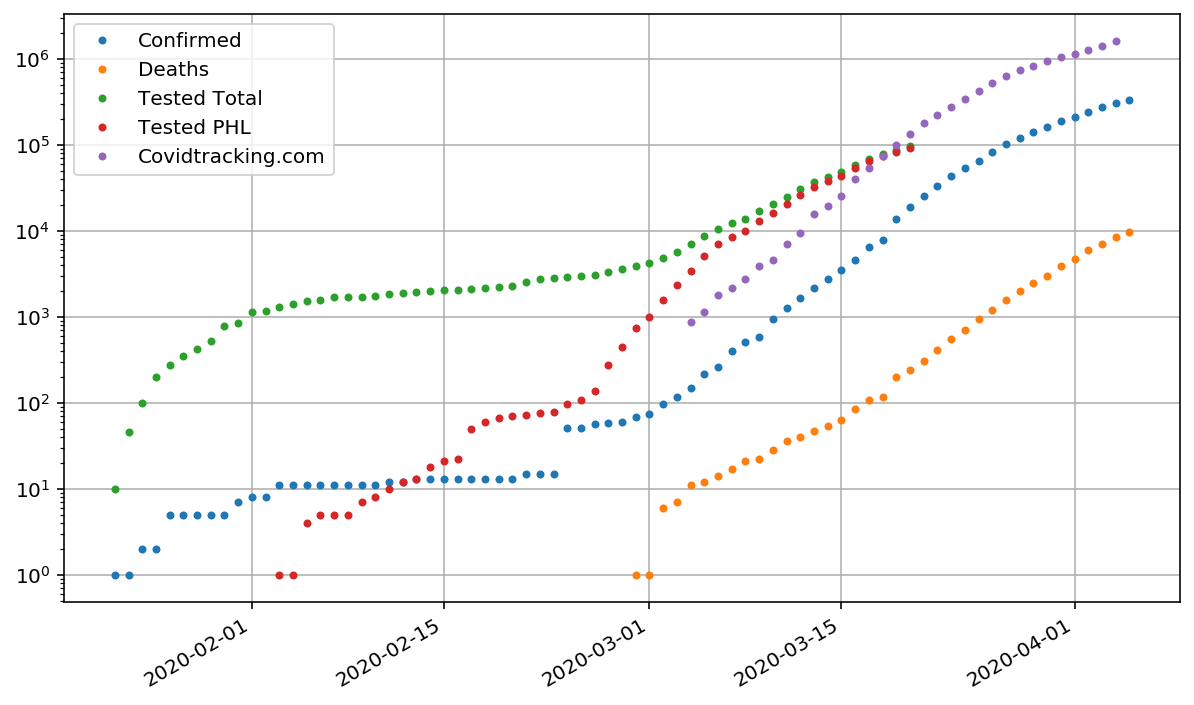

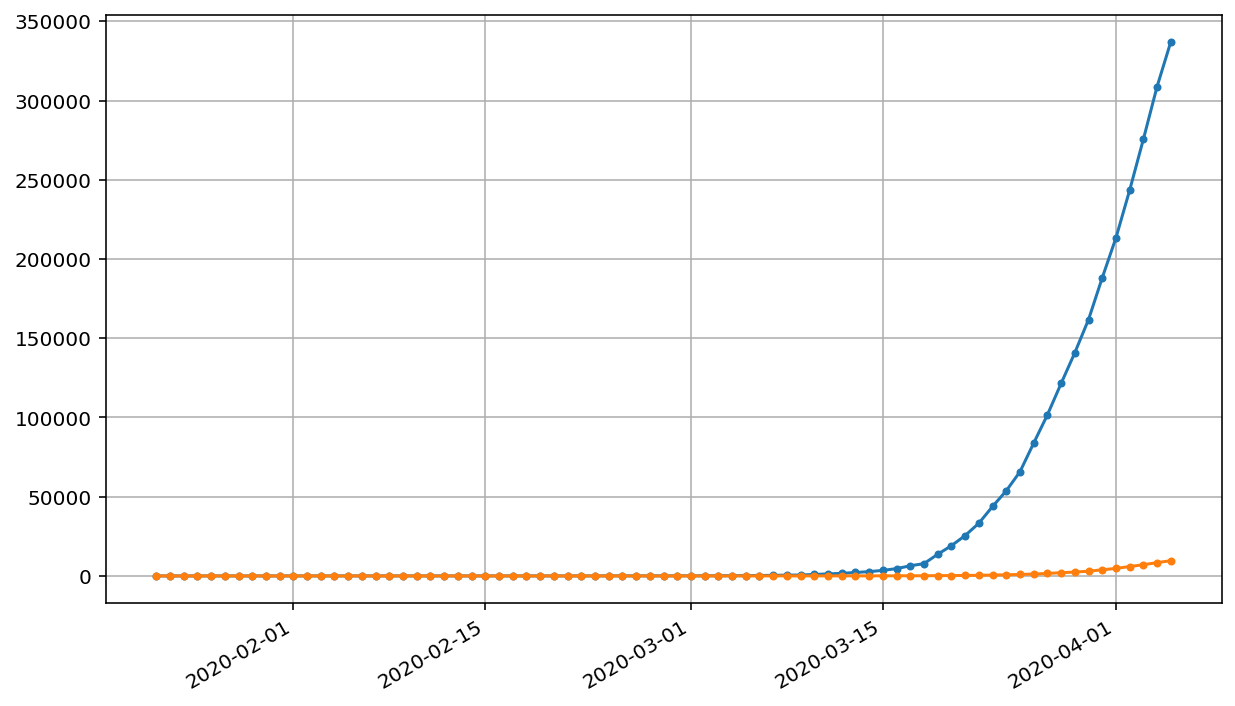

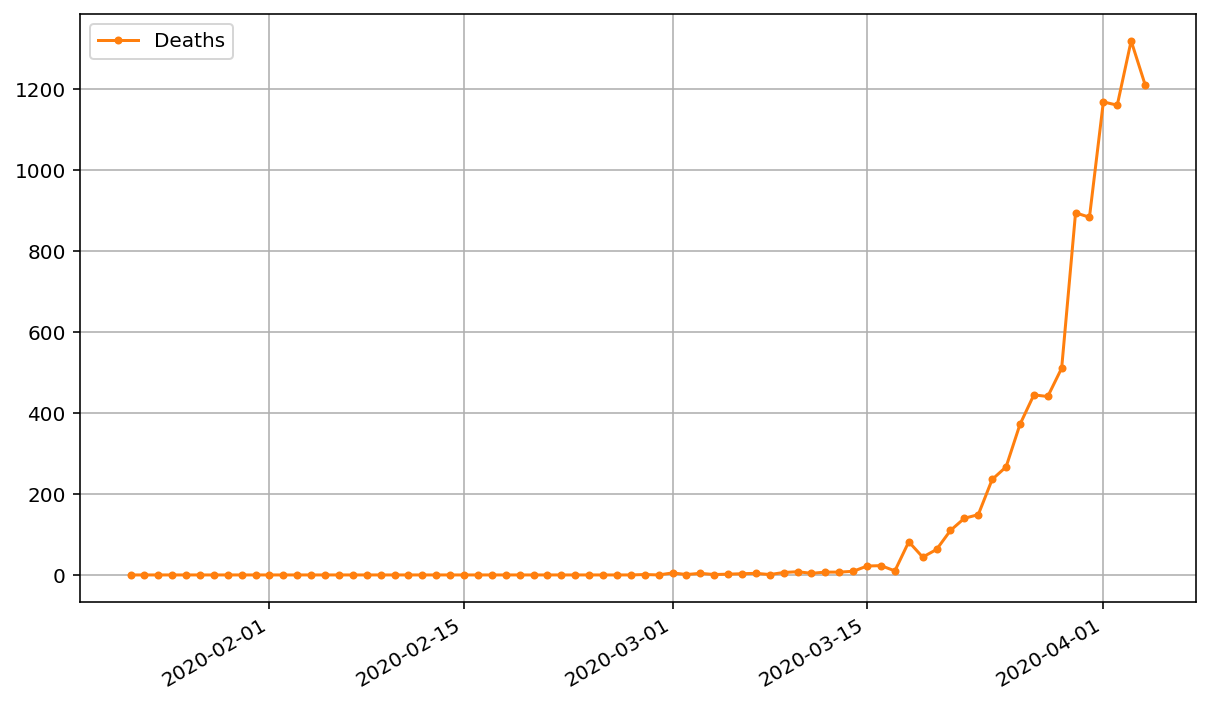

In [14]:
pd.plotting.register_matplotlib_converters()
f = plt.figure()
plt.semilogy(US['date'],US['confirmed'], '.', c='C0', label='Confirmed')
plt.semilogy(US_deaths['date'],US_deaths['deaths'], '.', c='C1', label='Deaths')
plt.semilogy(cumtests_tot_df['dates'], cumtests_tot_df['tests'], '.', c='C2', label='Tested Total')
plt.semilogy(cumtests_phl_df['dates'], cumtests_phl_df['tests'], '.', c='C3', label='Tested PHL')
plt.semilogy(tests2['date'], tests2['totalTestResults'], '.', c='C4', label='Covidtracking.com')

#plt.xlabel('Day')
plt.legend()
f.autofmt_xdate()

f = plt.figure()
plt.plot(US['date'], US['confirmed'],'.-',c='C0', label='Confirmed')
plt.plot(US_deaths['date'],US_deaths['deaths'],'.-',c='C1', label='Deaths')
f.autofmt_xdate()

f = plt.figure()
#plt.plot(US['date'][:-1], np.diff(US['confirmed']), '.-', c='C0', label='Confirmed')
plt.plot(US_deaths['date'][:-1], np.diff(US_deaths['deaths']), '.-', c='C1', label='Deaths')
plt.legend()
f.autofmt_xdate()

One key to the model is what percentage of tests end up positive.  We can see this from two datasets that it appears to be rounly 10-15% although the CDC data likely contains a time lag of 3-7 days associated with test result time.

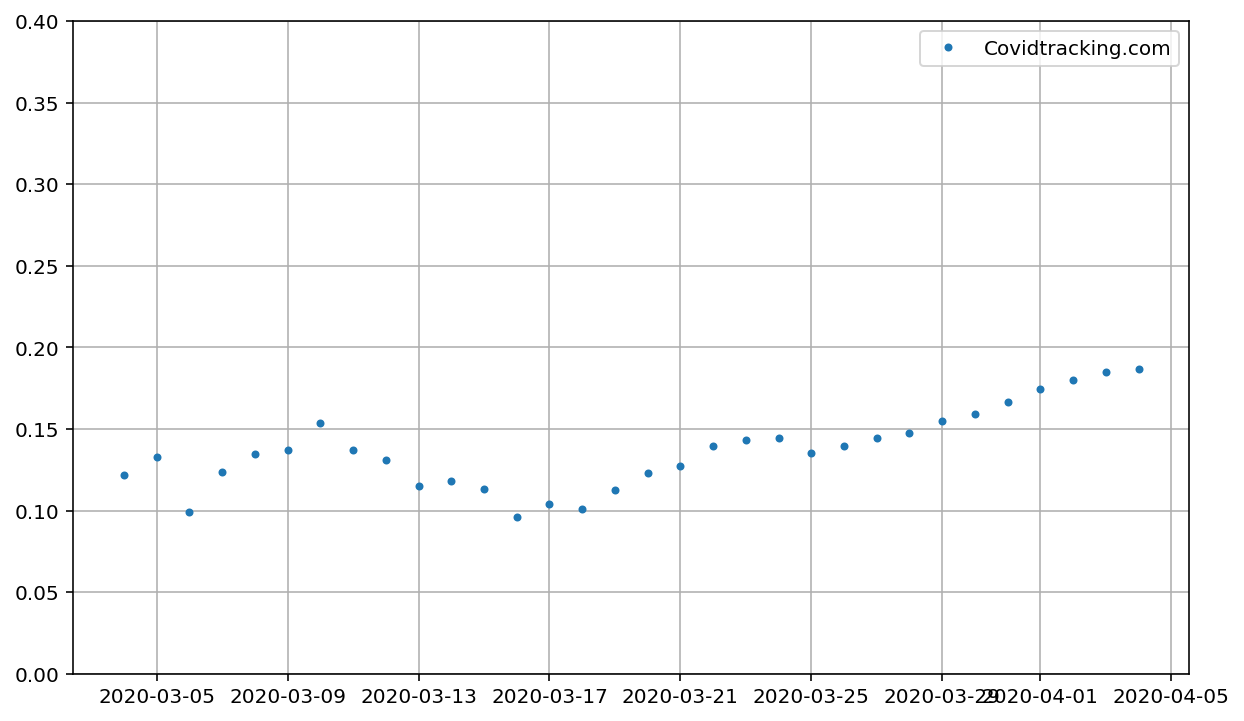

In [8]:
plt.figure()
#plt.plot(US['date'][0:-8], US['confirmed'][0:-8] / cumtests_total[:], '.', label='CDC')
#plt.plot(US['date'][3:-8], US['confirmed'][3:-8] / cumtests_total[:-3], '.', label='CDC 3-day delay')
plt.plot(tests2['date'], tests2['positive'] / tests2['total'], '.', label='Covidtracking.com')
plt.ylim(0,0.4)
plt.legend()

## The model
We now seek to model this data in order to understand the underlying infection rates and forecast them forward.  We will use the standard SIR model for the dynamics with the following additions:
- We will model the limitations of testing in the observed case numbers

### Testing model

In general we have reported a certain number of confirmed cases each day.  For a case to be confirmed, it must have been tested positive.  Those tests cover only a small portion of the population so there is some multiplication factor we must estimate to go from confirmed cases to total cases.  Assuming the majority of people being tested are because they have symptoms we can use the seasonal Influenza-like Illness (ILI) numbers as a background anchor.  Then we define the following things:

$$ N_{confirmed} = N_{tested} \phi_{positive}$$

But how many total cases does this indicate?  Well if we assume that the test negatives are some other similar condition with similar symptoms to SARS-CoV-2 (ILI) and that the majority of tests are being applied based on symptoms, we can say that:

$$\phi_{positive} = \frac{I}{N_{background}}$$

where $N_{background}$ is the number of Influenza-like Illnesses typical for the influenza season and $I$ is the number of active infections (per the SIR model below). 

The other parameter we want to define is the ratio of actual cases to confirmed cases:

$$Z = \frac{I}{N_{confirmed}}$$

Since we have data on how many tests are being performed and how many confirmed cases we have, we either need a model of $\phi$ or $Z$ to correlate observable variables with the underlying SIR model.

$\phi_{positive}$ appears to be around 0.1-0.15 for current testing but it also may be changing over time as COVID begins to dominate ILI.  We will look at two models for $\omega$, one that treats it as random constant in the model and another that treats it as a logistic function that asymptotes around the peak value for influenza in seasonal testing of 0.3:

In [10]:
def logistic(x, x0, k, L):
    return L / (1. + np.exp(-k * (x - x0)))

def fit_logistic(data, yinf, p0):
    p0 = [p0[0], p0[1], yinf]
    return curve_fit(logistic, range(0,len(data)), data, 
                     p0=p0, bounds=([0., 1e-2, 0.999*yinf], [120., 1., 1.001*yinf]), method='dogbox')

[26.70890347  0.17119075  0.4004    ]


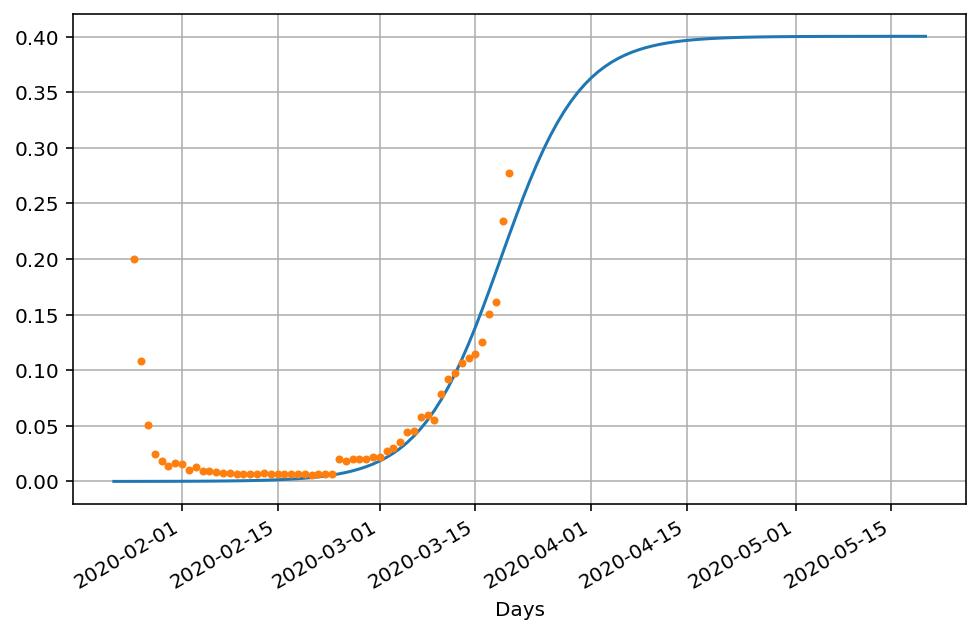

In [13]:
x = np.arange(0, 120)
base = datetime.datetime(2020, 1, 22)
dtx = numpy.array([base + datetime.timedelta(days=int(i)) for i in x])
x0_off = 30

popt_phi, pcov = fit_logistic(US['confirmed'][x0_off:-10] / cumtests_total[(x0_off-3):-3], 0.4, [53, 0.15])
print(popt_phi)

phi = lambda x: logistic(x, popt_phi[0]+x0_off, popt_phi[1], popt_phi[2])

f = plt.figure(figsize=(8,5))
plt.plot(dtx, phi(x))
plt.plot(US['date'][3:-10], US['confirmed'][3:-10] / cumtests_total[:-3], '.', label='CDC 3-day delay')
plt.xlabel("Days")
f.autofmt_xdate()

Of these parameters, we have hard data for $N_{confirmed}$ and $N_{tested}$ but $N_{background}$ is not well known so we will estimate it and treat is as a random variable.  Given the https://gis.cdc.gov/grasp/fluview/fluportaldashboard.html it seems like a reasonable estimate of current background ILI case rate is somewhwhere between 500 and 1,000 per week.

We also need to model number of tested.  We again will fit a logistic curve...

[2.31770644e+01 1.98439498e-01 1.99800000e+05]


Text(0.5, 0, 'Days')

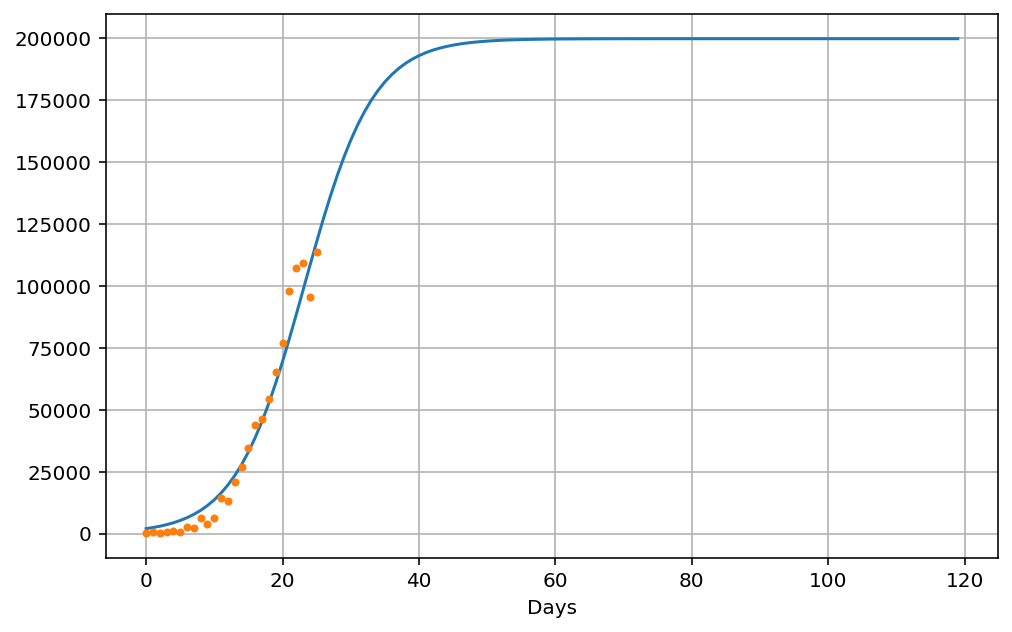

In [14]:
popt_Nt, pcov = fit_logistic(np.diff(tests2['totalTestResults']), 200000, [53, 0.25])
print(popt_Nt)

Nt = lambda x: logistic(x, popt_Nt[0], popt_Nt[1], popt_Nt[2])

plt.figure(figsize=(8,5))
plt.plot(x, Nt(x))
plt.plot(np.diff(tests2['totalTestResults']), '.', label='Tests')
plt.xlabel("Days")

### SIR Model

The [SIR model is defined as](https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology#The_SIR_model):

$$\begin{align}
& \frac{dS}{dt} = - \frac{\beta I S}{N}, \\
& \frac{dI}{dt} = \frac{\beta I S}{N}- \gamma I, \\
& \frac{dR}{dt} = \gamma I,
\end{align}$$

Because for now we have no recovered data and so we will ignore the third component for now remembering that for conservation of population, it must be considered in a sum.

Our state thus becomes:

$\vec{x} = \begin{bmatrix}S \\ I\end{bmatrix}$


We will tread both $\beta$ and $\gamma$ as random variables to estimate and our parameter vector will thus be:

$\vec{p} = \begin{bmatrix}\beta \\ \gamma \\ N_{background}\end{bmatrix}$

Finally we note that our observation model is 

$\vec{y} = C\vec{x} = \begin{bmatrix}0 &  \phi_{positive}(N_{background})\end{bmatrix}$

0.30984071267705077 0.10979767183774157 2.4199853288794013e-05 2.821924249313153


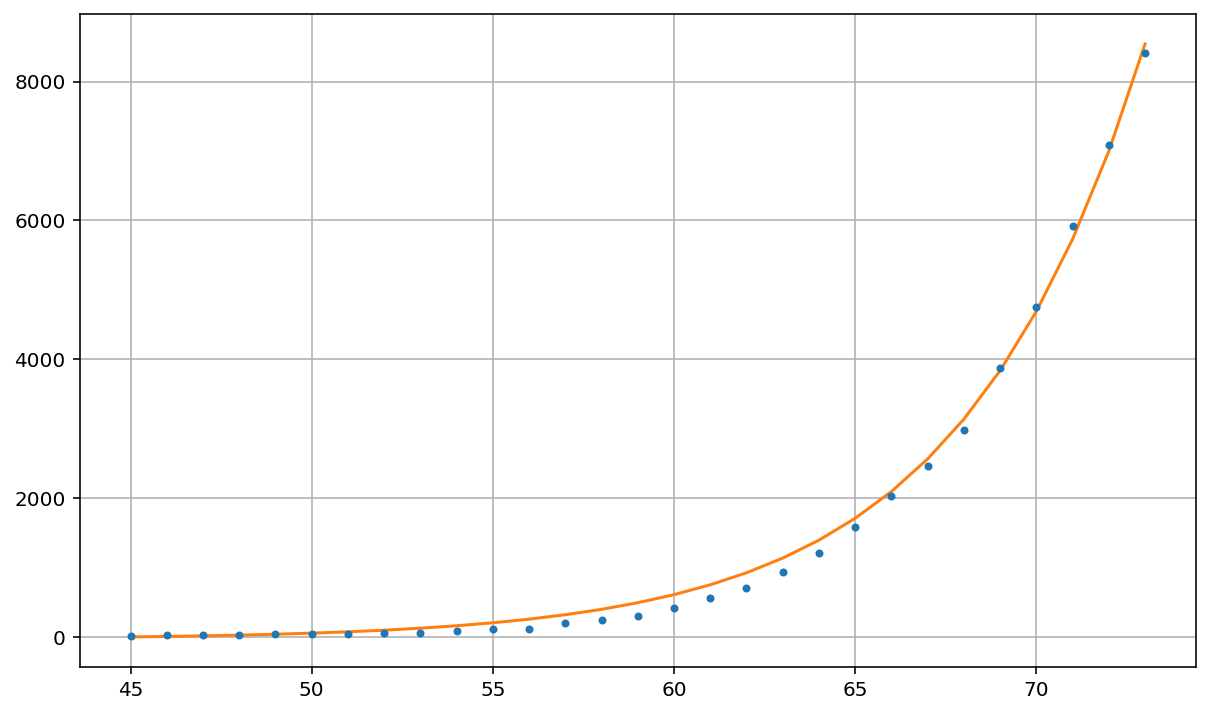

In [9]:
def SIR(y, t, p):
    ds = -p[0]*y[0]*y[1]
    di = p[0]*y[0]*y[1] - p[1]*y[1]
    dr = p[1] * y[1]
    return [ds, di, dr]
    
def SIR_deaths(t, i0, R0, gamma, mortality=0.008, N=300e6):
    p = [gamma*R0, gamma]
    y = odeint(SIR, t=t, y0=[1.-i0, i0, 0], args=(p,), rtol=1e-8)
    return N * mortality * y[:, 2]

t0 = 45
tf = len(US_deaths['deaths'].values)
i0 = 1e-6
gamma0 = 1. / 12.
R0 = 2.5
mortality = 0.008
beta0 = gamma0 * R0

popt, pcov = curve_fit(SIR_deaths, range(t0,tf), US_deaths['deaths'].values[t0:tf],
                     sigma=10./np.sqrt(US_deaths['deaths'].values[t0:tf] + 1), 
                     p0=(i0, R0, gamma0), bounds=([1e-9, 1., 1e-4], [1e-2, 10., 1.]), method='trf')
i0 = popt[0]
R0 = popt[1]
gamma = popt[2]
beta = gamma * R0

plt.errorbar(range(t0,tf), US_deaths['deaths'].values[t0:tf], 
             yerr=10./np.sqrt(US_deaths['deaths'].values[t0:tf] + 1), fmt='.')
plt.plot(range(t0,tf), 
         SIR_deaths(range(t0,tf), i0, R0, gamma))
#plt.yscale('log')
print(beta, gamma, i0, beta/gamma)

/Users/jonny/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log2
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/jonny/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:1057: RuntimeWarning: invalid value encountered in subtract
  out[tuple(slice1)] = (f[tuple(slice4)] - f[tuple(slice2)]) / (2. * ax_dx)
/Users/jonny/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:1078: RuntimeWarning: invalid value encountered in double_scalars
  out[tuple(slice1)] = (f[tuple(slice2)] - f[tuple(slice3)]) / dx_0
/Users/jonny/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
/Users/jonny/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  
/Users/jonny/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:1057: RuntimeWarning

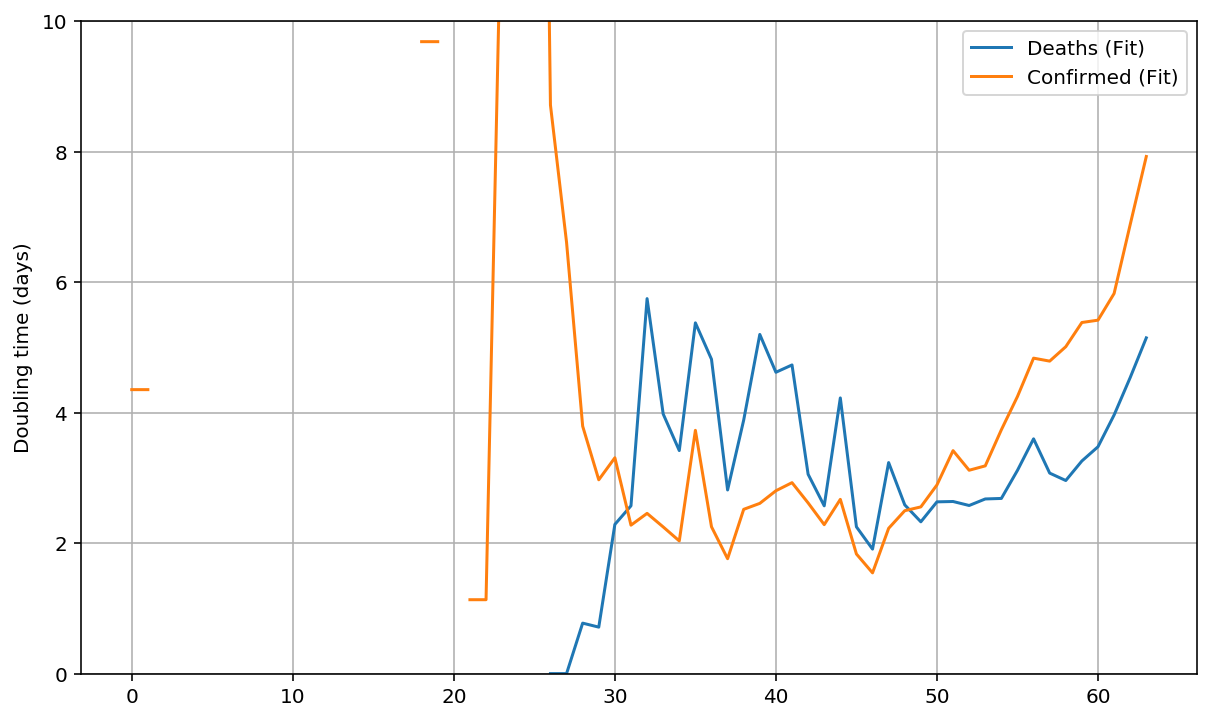

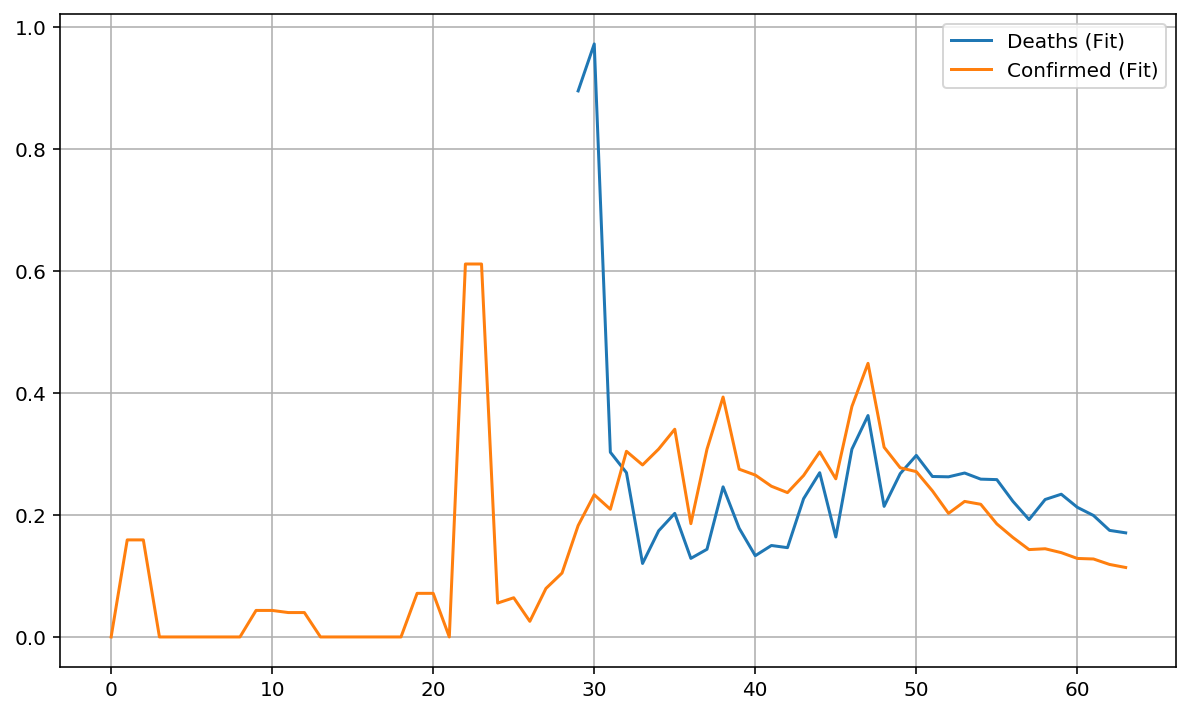

In [15]:
t0 = 10

d_deaths = np.gradient(np.log2(US_deaths['deaths'].values[t0:]))
d_confirmed = np.gradient(np.log2(US['confirmed'].values[t0:]))

plt.figure()
plt.plot(range(tf-len(d_deaths)-t0, tf-t0), 1./np.array(d_deaths), label='Deaths (Fit)')
plt.plot(range(tf-len(d_confirmed)-t0, tf-t0), 1./np.array(d_confirmed), label='Confirmed (Fit)')
plt.legend()
plt.ylabel('Doubling time (days)')
plt.ylim(0,10)

plt.figure()
plt.plot(np.gradient(np.log(US_deaths['deaths'].values[t0:tf])), label='Deaths (Fit)')
plt.plot(np.gradient(np.log(US['confirmed'].values[t0:tf])), label='Confirmed (Fit)')
plt.legend()

-0.008 0.3
-0.009999999999999998 0.3


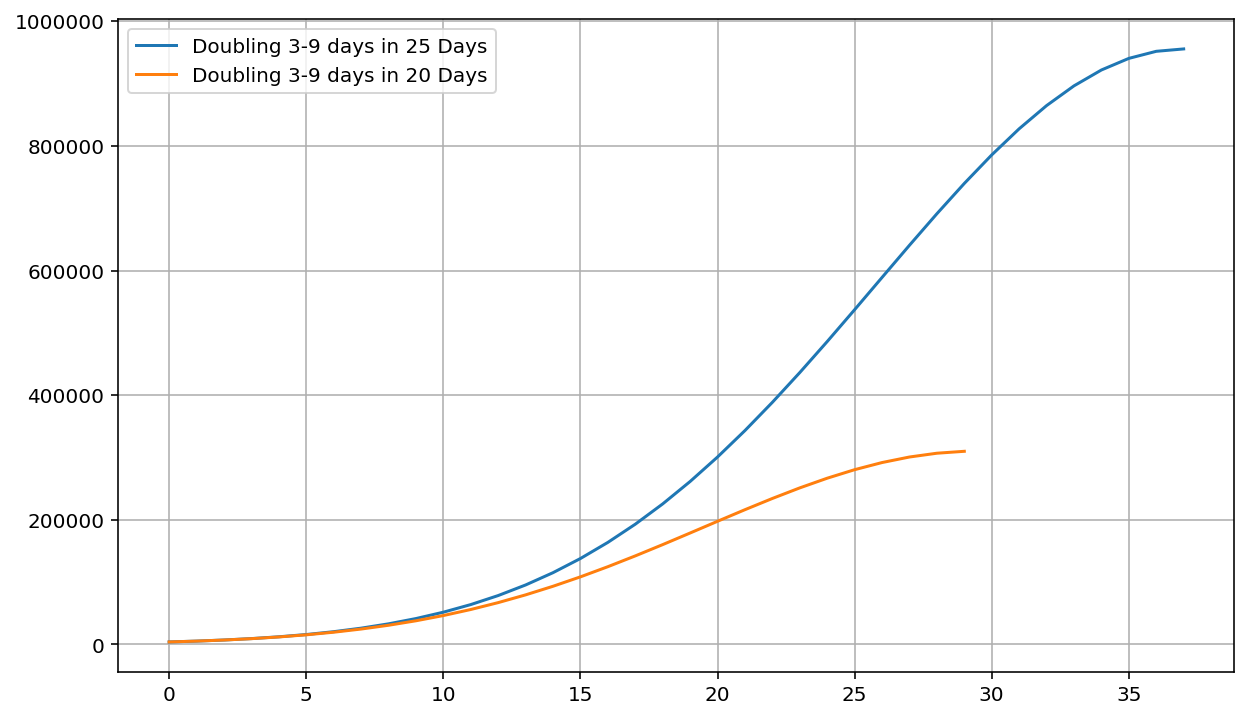

In [16]:
# Took Italy 20 days to go from dln(deaths)dt = 0.3 to 0.1 (doubling every 3 days to doubling every 9 days)
# US starting decreasing from 0.3 maybe 3 days ago meaning.
deaths_t0 = 4000.
deaths = [deaths_t0]
m = (0.1 - 0.3) / 25.
b = 0.3
print(m, b)
t = np.arange(0.,38)
delta = np.exp(b+m*t)
for i in range(1,len(t)):
    deaths.append(deaths[-1]+(delta[i]-1)*deaths[-1])
plt.plot(t, deaths, label='Doubling 3-9 days in 25 Days')

deaths = [deaths_t0]
m = (0.1 - 0.3) / 20.
b = 0.3
print(m, b)
t = np.arange(0.,30)
delta = np.exp(b+m*t)
for i in range(1,len(t)):
    deaths.append(deaths[-1]+(delta[i]-1)*deaths[-1])
plt.plot(t, deaths, label='Doubling 3-9 days in 20 Days')
plt.legend()

In [10]:
t0 = 40
times = np.arange(t0, 240, 1)
def SIR(y, t, p):
#     if t > 65:
#         p[0] = p[1]*1.5
    ds = -p[0]*y[0]*y[1]
    di = p[0]*y[0]*y[1] - p[1]*y[1]
    dr = p[1] * y[1]
    return [ds, di, dr]

N = 300e6
N_bg = 1e6

p = [beta, gamma]

# Create true curves
y = odeint(SIR, t=times, y0=[1.-i0, i0, 0], args=(p,), rtol=1e-8)

D = N * y[:,2] * mortality

def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x * 1e-6)

formatter = FuncFormatter(millions)

plt.figure()
plt.plot(times, N*y[:,0], label='Susceptible')
plt.plot(times, N*y[:,1], label='Infected')
plt.plot(times, N*y[:,2], label='Removed')
#plt.plot(range(t0,len(US['confirmed'].values)), 10.*US['confirmed'].values[t0:], '.', label='10xConfirmed Data')
plt.ylabel('US Total Cases')
plt.gca().yaxis.set_major_formatter(formatter)
plt.legend()

plt.figure()
plt.semilogy(times, D, label='Model')
plt.semilogy(range(t0,len(US_deaths['deaths'].values)), US_deaths['deaths'].values[t0:], '.', c='C1', label='Deaths')
plt.legend()
plt.ylabel('US Deaths')
plt.gca().yaxis.set_major_formatter(formatter)

plt.figure()
plt.semilogy(times, N*y[:,1], label='Model')
plt.semilogy(range(t0,len(US['confirmed'].values)), US['confirmed'].values[t0:], '.', c='C1', label='Confirmed Data')
plt.semilogy(range(t0,len(US['confirmed'].values)), 4*US['confirmed'].values[t0:], '.', c='C2', label='10xConfirmed Data')
plt.legend()
plt.ylabel('US Confirmed')
plt.gca().yaxis.set_major_formatter(formatter)

plt.figure()
plt.semilogy(N*y[0:len(US['confirmed'].values[t0:]),1] / US['confirmed'].values[t0:])
plt.legend()
plt.ylabel('Modeled/Confirmed Ratio')

TypeError: bad operand type for unary -: 'builtin_function_or_method'

In [1]:
from sir.sir import SIR
from sir.basssir import BassSIR
from time import time
from numpy import mean

params = {'filtering' : True, 'time_varying': False, 'data' : 10*US['confirmed'].values[t0:], 

# sir = BassSIR(ens, params)
sir = SIR(params)


500
